### 학습목표
- 데이터 분석을 위한 시각화 방법에 대해서 알아보자
- 데이터를 한눈에 알아보기위한 시각화를 진행하자 

### 시각화 도구 종류
1. pandas에서 제공하는 plot 함수 활용
    - 간단하고 손쉽게 그래프를 그릴때
2. 시각화 라이브러리 (matplotlib,seaborn)
   - 한땀한땀 사용화하여 그래프 출력 ,커스터 마이징 용이 

In [51]:
# 라이브러리 불러오기
import numpy as np # 수치계산용 라이브러리
import pandas as pd # 행과 열을 가지는 표와 같은 데이터를 다루는 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns # 시각화 라이브러리 (색감다양, 다양한 그래프 포함)
import warnings
warnings.filterwarnings('ignore')#경고 표시 안뜨게 
import matplotlib

# 한글 폰트 설정 (Windows: Malgun Gothic, Mac: AppleGothic)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False


In [8]:
hr=pd.read_csv('../../data/hr-info.csv',encoding='euc-kr')

In [9]:
hr.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


- 연도별 입사자 추세 확인 

In [10]:
hr["HIRE_DATE"]=pd.to_datetime(hr["HIRE_DATE"])

In [11]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EID                 200 non-null    object        
 1   ENAME               200 non-null    object        
 2   GENDER              200 non-null    object        
 3   ORG_CD              197 non-null    object        
 4   POS_CD              200 non-null    object        
 5   AGE                 200 non-null    int64         
 6   SERVICE_YEAR        200 non-null    int64         
 7   EDU_LEVEL           200 non-null    object        
 8   PERFORMANCE_SCORE   200 non-null    float64       
 9   SALARY              200 non-null    int64         
 10  LAST_PROMO_DT       182 non-null    object        
 11  TRAINING_HOURS      200 non-null    int64         
 12  SKILLS              200 non-null    object        
 13  ACTIVE_STATE        200 non-null    object        

In [18]:
hr.insert(15,'HIRE_YEAR',value=hr["HIRE_DATE"].dt.year)

In [152]:
#각 연도별 입사자 수정리 -> 연도순 절렬 (index)
hire_year=hr['HIRE_YEAR'].value_counts().sort_index()
c

EDU_LEVEL
학사 학위      79.5
석사 학위       8.5
박사 학위       6.0
고등학교 졸업     5.0
전문대 학위      1.0
Name: proportion, dtype: float64

<Axes: xlabel='HIRE_YEAR', ylabel='HIRE_COUNT'>

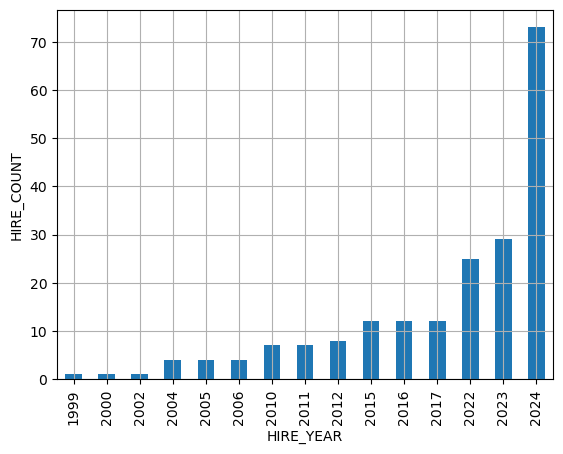

In [38]:
#데이터.plot() : pandas 에서 제공하는 시각화 기능 
a.plot(kind='bar',ylabel='HIRE_COUNT',grid=1)

In [88]:
b=hr.groupby('EDU_LEVEL')['SALARY'].mean().round(2).sort_values()
b=b.loc[['고등학교 졸업','전문대 학위','학사 학위','석사 학위','박사 학위']]

<Axes: xlabel='EDU_LEVEL', ylabel='SALARY'>

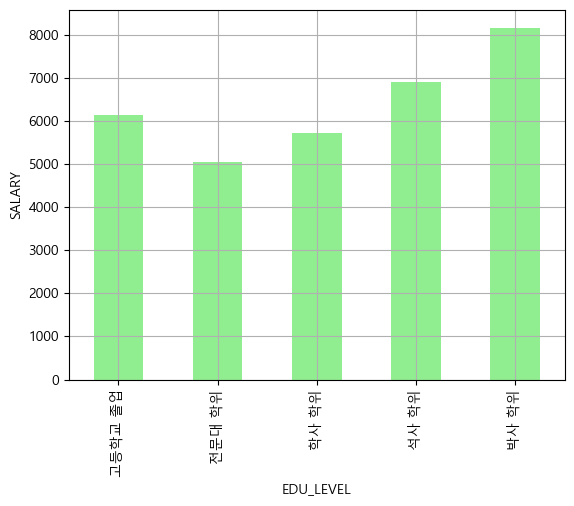

In [94]:
b.plot(kind='bar',ylabel='SALARY',grid=1,color='lightgreen')

- 학위,성별을 고려한 평균 연봉 시각화

In [106]:
c=hr.groupby(['GENDER','EDU_LEVEL'])['SALARY'].mean().round(2).sort_values()
c

GENDER  EDU_LEVEL
M       전문대 학위       4500.00
F       전문대 학위       5600.00
        학사 학위        5643.08
M       학사 학위        5785.11
        고등학교 졸업      6100.00
F       고등학교 졸업      6200.00
M       석사 학위        6525.00
F       석사 학위        7233.33
M       박사 학위        8037.50
F       박사 학위        8425.00
Name: SALARY, dtype: float64

<Axes: ylabel='SALARY'>

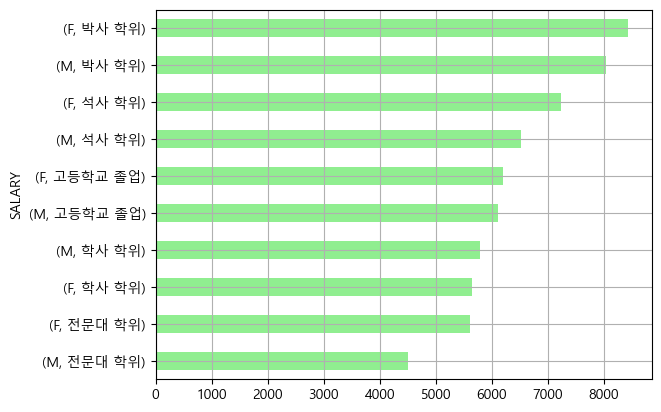

In [107]:
c.plot(kind='barh',ylabel='SALARY',grid=1,color='lightgreen')

In [132]:
#데이터 구조화 -> 피벗 테이블 
# 인덱스(학위,)
tmp=hr.groupby(['GENDER','EDU_LEVEL'])['SALARY'].mean().round(2).sort_values()

c=tmp.reset_index().pivot(index='EDU_LEVEL',columns='GENDER',values='SALARY')
tmp

GENDER  EDU_LEVEL
M       전문대 학위       4500.00
F       전문대 학위       5600.00
        학사 학위        5643.08
M       학사 학위        5785.11
        고등학교 졸업      6100.00
F       고등학교 졸업      6200.00
M       석사 학위        6525.00
F       석사 학위        7233.33
M       박사 학위        8037.50
F       박사 학위        8425.00
Name: SALARY, dtype: float64

In [133]:
d=tmp.unstack('GENDER')

array([<Axes: title={'center': 'F'}, ylabel='SALARY'>,
       <Axes: title={'center': 'M'}, ylabel='SALARY'>], dtype=object)

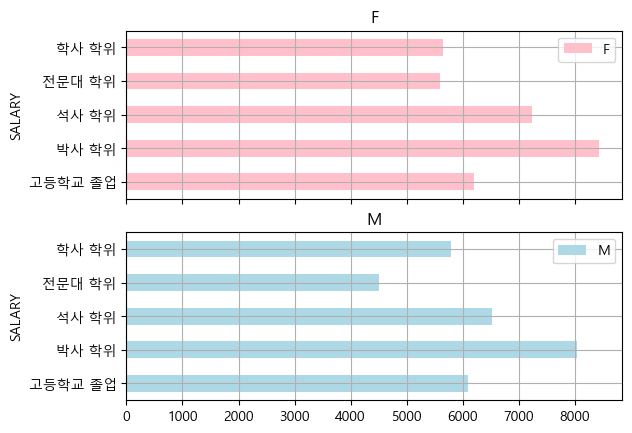

In [139]:
c.plot(kind='barh',ylabel='SALARY',grid=1,color=['pink','lightblue'],subplots=True)

<Axes: xlabel='EDU_LEVEL', ylabel='SALARY'>

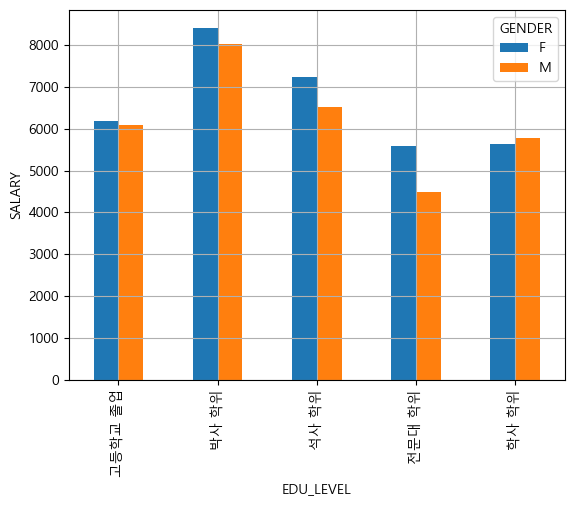

In [135]:
d.plot(kind='bar',ylabel='SALARY',grid=1)

array([<Axes: title={'center': 'F'}, ylabel='EDU_LEVEL'>,
       <Axes: title={'center': 'M'}, ylabel='EDU_LEVEL'>], dtype=object)

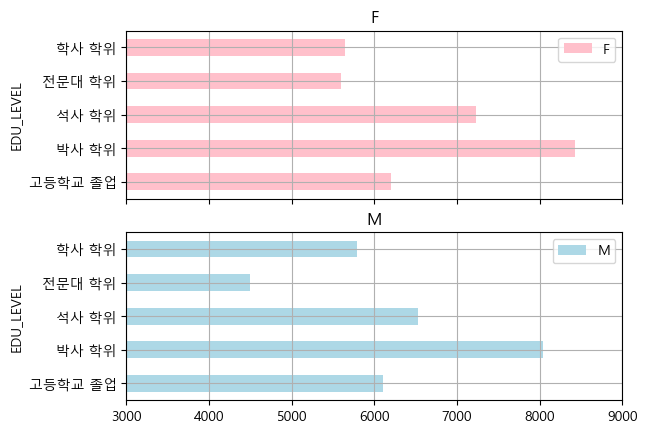

In [143]:
c.plot(kind='barh',grid=1,color=['pink','lightblue'],subplots=True,xlim=(3000,9000))

- 학위별 비율 시각화
 - pie 차트

In [148]:
c=hr['EDU_LEVEL'].value_counts('m')*100

<Axes: title={'center': '학위별 비율'}, ylabel='proportion'>

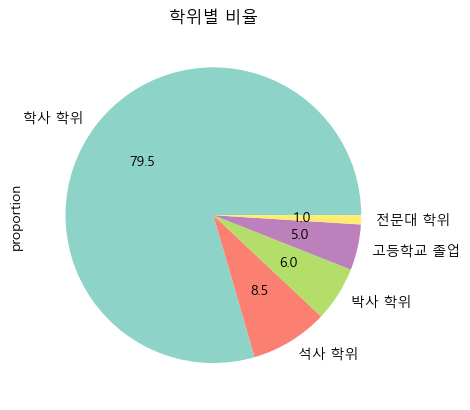

In [151]:
c.plot(kind='pie',autopct='%.1f',title='학위별 비율',colormap='Set3')

matplotlib 을 할용한 그래프 시각화 

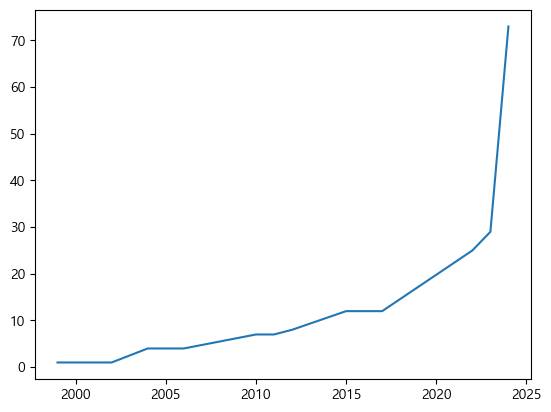

In [153]:
plt.plot(hire_year)

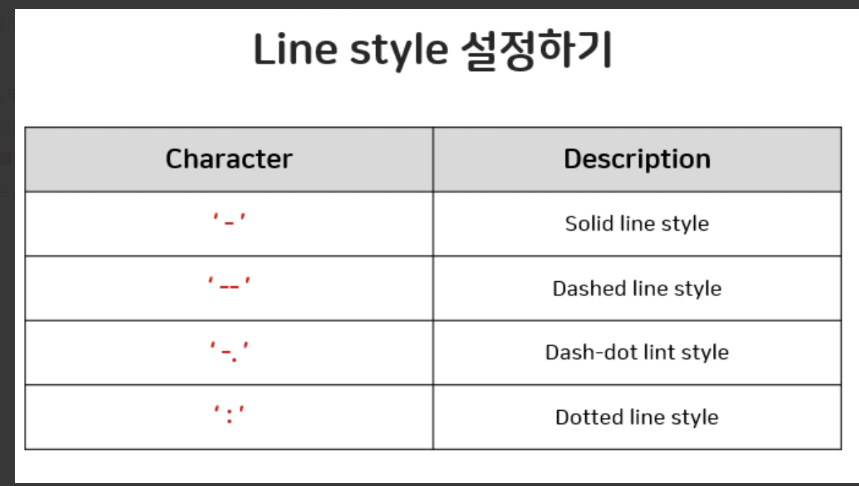

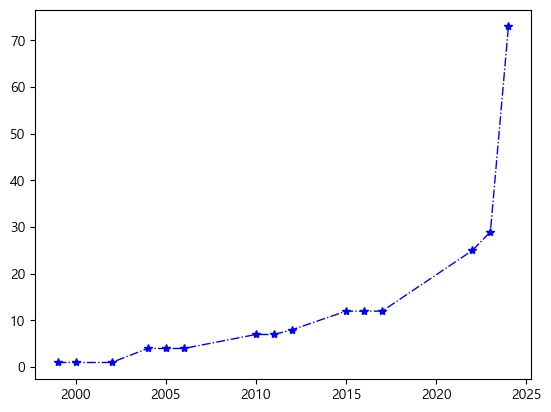

In [162]:
plt.plot(hire_year,
        ls='-.',
        lw=1,
         color='blue',
         marker='*'
        )


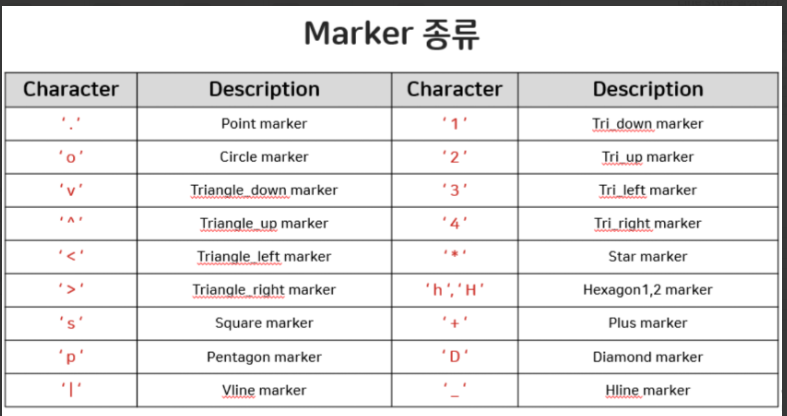

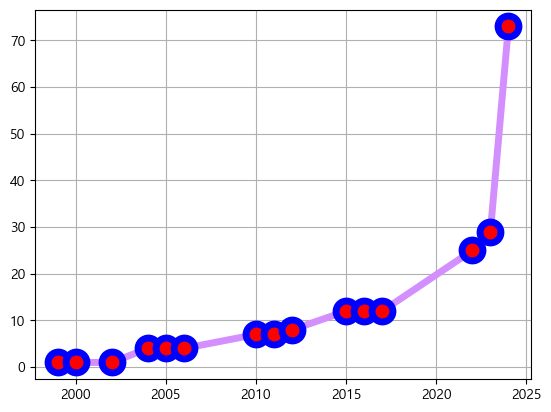

In [165]:
plt.plot(hire_year,
        ls = '-',   # line style : 선의 종류
        lw = 5,     # line width : 선의 두께
        color = '#D48FFFFF',  # 선의 색
         marker = 'o',   # marker 표시
         mfc = 'red',    # marker face color : 마커 색
         mec = 'blue',   # marker edge color : 마커 선 색
         ms = 15,        # marker size : 마커 크기
         mew = 5         # marker egde width : 마커 선 두께
        )
plt.grid()

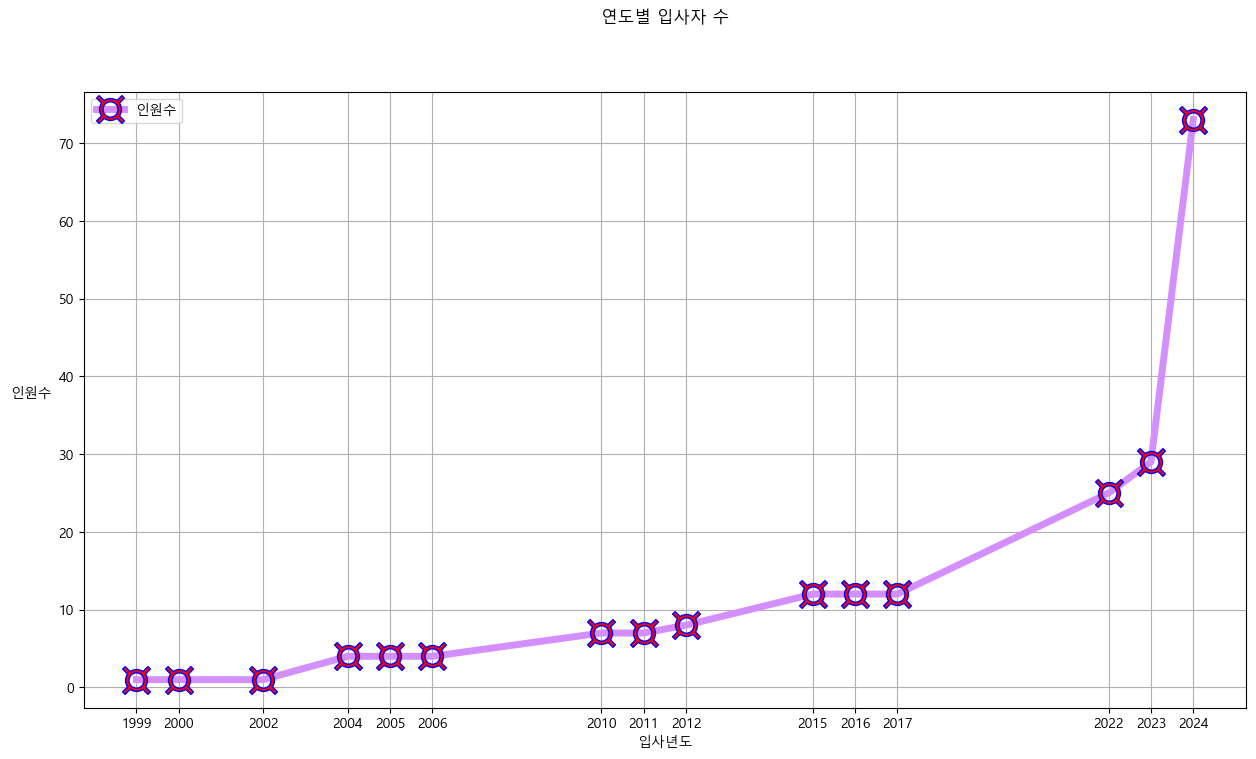

In [168]:
# plt.plot(데이터 셋)
plt.figure(figsize=(15,8))
plt.plot(hire_year,
        ls = '-',   # line style : 선의 종류
        lw = 5,     # line width : 선의 두께
        color = '#D48FFFFF',  # 선의 색
         marker = '$💩$',   # marker 표시
         mfc = 'red',    # marker face color : 마커 색
         mec = 'blue',   # marker edge color : 마커 선 색
         ms = 20,        # marker size : 마커 크기
         mew = 1,        # marker egde width : 마커 선 두께
         label='인원수'
        )
plt.grid()
plt.xticks(hire_year.index)
plt.xlabel('입사년도')
plt.ylabel('인원수', labelpad = 20).set_rotation(0)
plt.title('연도별 입사자 수',pad=50)
plt.legend()
plt.show()